In [7]:
from fastai.vision.all import load_learner
import json

learn = load_learner("ok_nok_resnet18_fastai.pkl")

with open("ok_nok_threshold.json") as f:
    cfg = json.load(f)
THRESHOLD_OK = cfg["threshold_ok"]

In [9]:
from fastai.vision.all import PILImage

def predict_image(img_path, threshold=THRESHOLD_OK):
    """
    Prédit OK / NOK pour une image individuelle en appliquant un threshold
    sur la probabilité de la classe 'ok'.

    - img_path : chemin vers l'image (str ou Path)
    - threshold : seuil à partir duquel on accepte la classe 'ok'
    """
    # Load image
    img = PILImage.create(img_path)

    # Fastai prediction (probas + classe brute)
    pred_label, pred_idx, probs = learn.predict(img)

    # Probability of the "ok" class
    idx_ok = learn.dls.vocab.o2i["ok"]
    prob_ok = float(probs[idx_ok])

    # Apply threshold
    final_label = "ok" if prob_ok >= threshold else "nok"

    # Display image + metrics
    display(img.to_thumb(256, 256))
    print(f"Probabilité 'ok' = {prob_ok:.4f}")
    print(f"Seuil utilisé     = {threshold:.2f}")
    print(f"Prédiction brute  = {pred_label}")
    print(f"Prédiction finale = {final_label}")

    return final_label, prob_ok


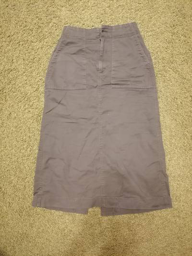

Probabilité 'ok' = 1.0000
Seuil utilisé     = 0.99
Prédiction brute  = ok
Prédiction finale = ok


('ok', 1.0)

In [10]:
predict_image('dataset/val/ok/ok_000042.jpg')

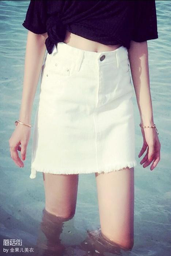

Probabilité 'ok' = 0.0000
Seuil utilisé     = 0.99
Prédiction brute  = nok
Prédiction finale = nok


('nok', 1.567806773294933e-09)

In [11]:
predict_image('dataset/val/nok/nok_000035.jpg')